In [1]:
import numpy as np

In [2]:
A = np.array([[4, 2],
              [1, 3]])

In [3]:
A

array([[4, 2],
       [1, 3]])

In [6]:
eigenvalues,  eigenvectors=  np.linalg.eig(A)

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names


In [33]:
X_means = X - np.mean(X, axis = 0)

In [20]:
# 공분산
# 데이터가 서로 어떻게 변하는가?
cov_mat = np.cov(X_means, rowvar=False)

In [22]:
eigenvalues,  eigenvectors = np.linalg.eig(cov_mat)

In [24]:
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [26]:
sorted_index = np.argsort(eigenvalues)[::-1]

In [28]:
sorted_eigenvectors = eigenvectors[:, sorted_index]

In [31]:
eigenvectors_subset = sorted_eigenvectors[:, :2]

In [35]:
X_reduced = np.dot(X_means, eigenvectors_subset)

In [36]:
X_reduced

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

In [38]:
pca = PCA(n_components=2)

In [42]:
X_pca = pca.fit_transform(X)

In [43]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

각 주성분의 분산 비율: [0.72962445 0.22850762]
총 보존된 정보량: 0.9581320720000164


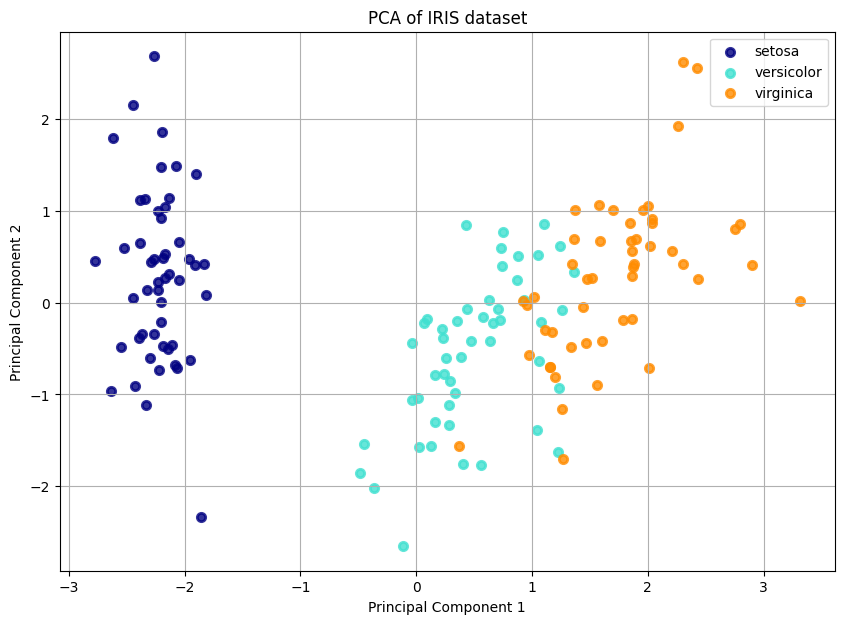

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터 전처리: 표준화 (Standardization)
# PCA 수행 전 반드시 거쳐야 하는 과정입니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Scikit-learn을 이용한 PCA 수행
# 4차원의 데이터를 시각화가 가능한 2차원으로 축소합니다.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 고유값(Explained Variance) 확인
# 각 주성분이 원본 데이터의 전체 분산 중 얼마만큼을 설명하는지 나타냅니다.
print("각 주성분의 분산 비율:", pca.explained_variance_ratio_)
print("총 보존된 정보량:", np.sum(pca.explained_variance_ratio_))

# 5. 시각화 결과 분석
plt.figure(figsize=(10, 7))
colors = ['navy', 'turquoise', 'darkorange']
for i, color, target_name in zip([0, 1, 2], colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()